# Análisis de resultados de Pron vs. Prompt

En este cuaderno analizamos los datos del experimento Pron vs. Prompt. Principalmente, haremos un análisis descriptivo y de correlaciones. Dejamos el modelo de efectos mixtos para R.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import matplotlib

# Configurar la fuente de toda la figura en Times New Roman
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

Unas variables auxiliares que nos permitirán seleccionar subconjuntos de los datos.

In [2]:
columns_study = ['1_atractivo_titulo',
       '1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_titulo',
       '2_originalidad_estilo', '2_originalidad_tema', '3_relevancia',
       '4_creatividad_titulo', '4_creatividad_sinopsis',
       '5_autoria_titulo', '5_autoria_sinopsis',
       '6_antologia', '6_opinion_lectores',
       '6_opinion_criticos', '6_voz_propia',]
columns_numeric_title = ['1_atractivo_titulo', 
       '2_originalidad_titulo', 
       '4_creatividad_titulo',]
columns_numeric_synopsis = ['1_atractivo_estilo', '1_atractivo_tema',
        '2_originalidad_estilo', '2_originalidad_tema',
       '4_creatividad_sinopsis', ]
       # '6_antologia', '6_opinion_lectores', '6_opinion_criticos', '6_voz_propia']
columns_numeric_synopsis_without6 = ['1_atractivo_estilo', '1_atractivo_tema',
        '2_originalidad_estilo', '2_originalidad_tema',
       '4_creatividad_sinopsis',]

#### Preparación de los DataFrames

Vamos a generar unas ids para las distintas operaciones sobre los datos.
- ``id_item``: nos permite identificar de manera unívoca la sinopsis que ha escrito un agente, pero no distingue entre evaluadores.
- ``id_user``: nos permite identificar cada sinopsis votada por cada crítico. No distingue entre escritores, esto nos permite hacer merge con los datos de Patricio, por un lado, y de GPT por otro.

In [3]:
df = pd.read_csv('data/resultados_en_bruto.csv')
df['id_title_sinopsis_writer'] = df['title_id'] + '_' + df['sinopsis_writer']
df['id_title_title_writer'] = df['title_id'] + '_' + df['title_writer']
df['id_title_user'] = df['title_id'] + '_' + df['username'] 
df.columns

Index(['Unnamed: 0', 'timestamp', 'username', '1_atractivo_titulo',
       '1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_titulo',
       '2_originalidad_estilo', '2_originalidad_tema', '3_relevancia',
       '4_creatividad_titulo', '4_creatividad_sinopsis',
       '4_creatividad_comentario', '5_autoria_titulo', '5_autoria_sinopsis',
       '5_autoria_comentario', '6_antologia', '6_opinion_lectores',
       '6_opinion_criticos', '6_voz_propia', '6_comentario', 'title',
       'title_id', 'sinopsis_writer', 'title_writer', 'experiment',
       'id_title_sinopsis_writer', 'id_title_title_writer', 'id_for_es_en',
       'id_title_user'],
      dtype='object')

In [4]:
df['title_writer'].unique()

array(['patricio', 'machine'], dtype=object)

In [5]:
def select_title_df(df, writer, df_new):
    df_filtered = copy.copy(df[df['title_writer']==writer]).reset_index()
    dic_writers = {'patricio':'Human', 'machine':'GPT4'}
    writer = dic_writers[writer]
    df_new[f'Title Attractiveness {writer}'] = df_filtered['1_atractivo_titulo'] + 1 
    df_new[f'Title Originality {writer}'] = df_filtered['2_originalidad_titulo'] + 1 
    df_new[f'Title Creativity {writer}'] = df_filtered['4_creatividad_titulo'] + 1 
    return df_new

In [6]:
df_new = pd.DataFrame()
select_title_df(df, 'patricio', df_new)
select_title_df(df, 'machine', df_new)
df_new

,Title Attractiveness Human,Title Originality Human,Title Creativity Human,Title Attractiveness GPT4,Title Originality GPT4,Title Creativity GPT4
0,3,3,3,1,1,1
1,2,3,2,3,3,3
2,3,3,3,3,3,3
3,3,3,2,3,2,1
4,2,2,1,1,1,1
...,...,...,...,...,...,...
355,3,3,3,2,2,2
356,2,2,1,1,1,1
357,3,2,2,2,2,2
358,3,2,1,1,2,2


In [7]:
df_new.columns

Index(['Title Attractiveness Human', 'Title Originality Human',
       'Title Creativity Human', 'Title Attractiveness GPT4',
       'Title Originality GPT4', 'Title Creativity GPT4'],
      dtype='object')

In [8]:
cols = ['Title Attractiveness Human',
       'Title Attractiveness GPT4', 'Title Originality Human',
       'Title Originality GPT4', 'Title Creativity Human',
       'Title Creativity GPT4']
df_new = df_new[cols]

c:\Users\gmarc\anaconda3\envs\nlp\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\gmarc\anaconda3\envs\nlp\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


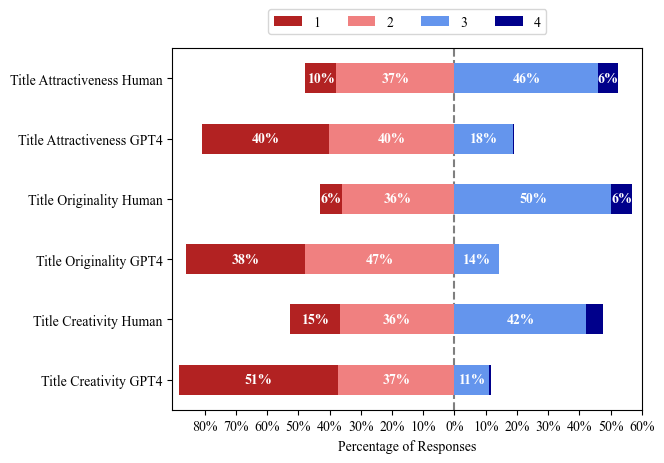

In [9]:
# Imprimir el diccionario
import plot_likert

ax = plot_likert.plot_likert(df_new, 
                        [1,2,3,4],
                        plot_percentage=True,
                        bar_labels=True,
                     colors=plot_likert.colors.default_with_darker_neutral,
                     figsize=(7,5))
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=4, title='')
plt.tight_layout(pad=2.0)
# Ajustar el tamaño de las fuentes
plt.rc('font', size=9)          # Texto general
plt.rc('axes', titlesize=14)     # Título de los ejes
plt.rc('axes', labelsize=14)     # Etiquetas de los ejes
plt.rc('xtick', labelsize=14)    # Etiquetas del eje x
plt.rc('ytick', labelsize=14)    # Etiquetas del eje y
plt.rc('legend', fontsize=14)    # Texto de la leyenda
plt.savefig('figures/titles_comparison.pdf', backend='pgf')
plt.show()

## Analisis de significancia de lo quecada uno ha escrito

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import matplotlib

# Configurar la fuente de toda la figura en Times New Roman
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

Unas variables auxiliares que nos permitirán seleccionar subconjuntos de los datos.

In [11]:
columns_study = ['1_atractivo_titulo',
       '1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_titulo',
       '2_originalidad_estilo', '2_originalidad_tema', '3_relevancia',
       '4_creatividad_titulo', '4_creatividad_sinopsis',
       '5_autoria_titulo', '5_autoria_sinopsis',
       '6_antologia', '6_opinion_lectores',
       '6_opinion_criticos', '6_voz_propia',]
columns_numeric_title = ['1_atractivo_titulo', 
       '2_originalidad_titulo', 
       '4_creatividad_titulo',]
columns_numeric_synopsis = ['1_atractivo_estilo', '1_atractivo_tema',
        '2_originalidad_estilo', '2_originalidad_tema',
       '4_creatividad_sinopsis', ]
       # '6_antologia', '6_opinion_lectores', '6_opinion_criticos', '6_voz_propia']
columns_numeric_synopsis_without6 = ['1_atractivo_estilo', '1_atractivo_tema',
        '2_originalidad_estilo', '2_originalidad_tema',
       '4_creatividad_sinopsis',]

#### Preparación de los DataFrames

Vamos a generar unas ids para las distintas operaciones sobre los datos.
- ``id_item``: nos permite identificar de manera unívoca la sinopsis que ha escrito un agente, pero no distingue entre evaluadores.
- ``id_user``: nos permite identificar cada sinopsis votada por cada crítico. No distingue entre escritores, esto nos permite hacer merge con los datos de Patricio, por un lado, y de GPT por otro.

In [12]:
df = pd.read_csv('data/resultados_en_bruto.csv')
df['id_title_sinopsis_writer'] = df['title_id'] + '_' + df['sinopsis_writer']
df['id_title_title_writer'] = df['title_id'] + '_' + df['title_writer']
df['id_for_es_en'] = df['title_id'] + '_' + df['sinopsis_writer'].replace('_es','').replace('_en','')
df['id_title_user'] = df['title_id'] + '_' + df['username'] 
df.columns

Index(['Unnamed: 0', 'timestamp', 'username', '1_atractivo_titulo',
       '1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_titulo',
       '2_originalidad_estilo', '2_originalidad_tema', '3_relevancia',
       '4_creatividad_titulo', '4_creatividad_sinopsis',
       '4_creatividad_comentario', '5_autoria_titulo', '5_autoria_sinopsis',
       '5_autoria_comentario', '6_antologia', '6_opinion_lectores',
       '6_opinion_criticos', '6_voz_propia', '6_comentario', 'title',
       'title_id', 'sinopsis_writer', 'title_writer', 'experiment',
       'id_title_sinopsis_writer', 'id_title_title_writer', 'id_for_es_en',
       'id_title_user'],
      dtype='object')

Ahora creamos los DataFrame para estudiar, separados por escritor de cada sinopsis, que es el objetivo principal de nuestro experimento. Esa diferencia.

In [13]:
map_gpt = {'gpt4_es':'GPT4','gpt4_en':'GPT4', 'patricio':'Patricio'}
df['sinopsis_author_general'] = df['sinopsis_writer'].apply(lambda x: map_gpt[x])

In [14]:
gpt_sinopsis = df[df['sinopsis_author_general']=='GPT4']
gpt_title_by_patricio = copy.copy(gpt_sinopsis[gpt_sinopsis.title_writer=='patricio'].reset_index(drop=True))
gpt_title_by_gpt = copy.copy(gpt_sinopsis[gpt_sinopsis.title_writer=='machine'].reset_index(drop=True))

In [15]:
patricio_sinopsis = df[df['sinopsis_author_general']=='Patricio']
patricio_title_by_patricio = copy.copy(patricio_sinopsis[patricio_sinopsis.title_writer=='patricio'].reset_index(drop=True))
patricio_title_by_gpt = copy.copy(patricio_sinopsis[patricio_sinopsis.title_writer=='machine'].reset_index(drop=True))

In [16]:
gpt_title_by_gpt.describe()

,Unnamed: 0,1_atractivo_titulo,1_atractivo_estilo,1_atractivo_tema,2_originalidad_titulo,2_originalidad_estilo,2_originalidad_tema,4_creatividad_titulo,4_creatividad_sinopsis,6_antologia,6_opinion_lectores,6_opinion_criticos,6_voz_propia
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,180.350000,0.877778,0.538889,0.688889,0.805556,0.394444,0.766667,0.683333,0.788889,0.622222,1.833333,2.338889,0.622222
std,97.312402,0.767027,0.654711,0.764352,0.709845,0.602576,0.693948,0.720607,0.754790,0.733520,0.454647,0.580540,0.725863
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,181.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000
75%,258.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000
max,350.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [17]:
gpt_title_by_patricio.describe()

,Unnamed: 0,1_atractivo_titulo,1_atractivo_estilo,1_atractivo_tema,2_originalidad_titulo,2_originalidad_estilo,2_originalidad_tema,4_creatividad_titulo,4_creatividad_sinopsis,6_antologia,6_opinion_lectores,6_opinion_criticos,6_voz_propia
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,178.650000,1.416667,0.694444,0.822222,1.527778,0.594444,0.838889,1.316667,0.911111,0.855556,1.877778,2.272222,0.783333
std,110.676764,0.775858,0.755592,0.733520,0.712463,0.752628,0.770720,0.801361,0.800062,0.859532,0.404659,0.547524,0.749488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,71.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,179.500000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000
75%,282.750000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,1.000000
max,359.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu

# Función para realizar la prueba de Mann-Whitney U y calcular el tamaño del efecto
def mann_whitney_test_with_effect_size(data1, data2):
    stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    n1 = len(data1)
    n2 = len(data2)
    # Calcular la media y desviación estándar del estadístico U
    mean_U = n1 * n2 / 2
    std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    # Calcular el valor Z
    z = (stat - mean_U) / std_U
    # Calcular el tamaño del efecto
    effect_size = z / np.sqrt(n1 + n2)
    return stat, p_value, effect_size

# Función para aplicar la prueba a columnas numéricas que se llaman igual
def apply_mann_whitney_to_matching_columns(df1, df2):
    # Encontrar columnas numéricas comunes
    numeric_columns_df1 = df1.select_dtypes(include=[np.number]).columns
    numeric_columns_df2 = df2.select_dtypes(include=[np.number]).columns
    common_numeric_columns = list(set(numeric_columns_df1) & set(numeric_columns_df2))
    
    results = []
    for column in sorted(common_numeric_columns):
        data1 = df1[column]
        data2 = df2[column]
        if len(data1) > 0 and len(data2) > 0:
            stat, p_value, effect_size = mann_whitney_test_with_effect_size(data1, data2)
            results.append({
                'column': column,
                'U_statistic': stat,
                'p_value': p_value,
                'effect_size': effect_size
            })
    
    results_df = pd.DataFrame(results)
    return results_df



In [19]:
c = ['1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_estilo', '2_originalidad_tema', '4_creatividad_sinopsis', '6_voz_propia', '6_antologia']

In [20]:
resultados = apply_mann_whitney_to_matching_columns(gpt_title_by_gpt[c], gpt_title_by_patricio[c])
resultados

,column,U_statistic,p_value,effect_size
0,1_atractivo_estilo,14520.0,0.058801,-0.089686
1,1_atractivo_tema,14403.0,0.047614,-0.095932
2,2_originalidad_estilo,14001.0,0.010146,-0.117392
3,2_originalidad_tema,15544.5,0.466778,-0.034993
4,4_creatividad_sinopsis,14898.0,0.152981,-0.069506
5,6_antologia,13862.0,0.010020,-0.124812
6,6_voz_propia,14225.0,0.028743,-0.105434


### Diagrama radial

Este diagrama nos permite ver quién "gana" de media. 

In [21]:
def extraer_prefijos(lista_cadenas):
    prefijos = []
    for cadena in lista_cadenas:
        if '__' in cadena:
            prefijo = cadena.split('__')[0]
            prefijos.append(prefijo)
        else:
            prefijos.append(cadena)
    return prefijos

def generate_df_radial_plot(df_dict):
    df_radial_plot = pd.DataFrame()
    for key, value in df_dict.items():
        value.columns = extraer_prefijos(value)
        df_radial_plot[key] = value.transpose()['mean']
    df_radial_plot = df_radial_plot.transpose()
    return df_radial_plot

In [22]:
map_labels = {
    '1_atractivo_estilo':'Style Attractiveness',
    '1_atractivo_tema':'Theme Attractiveness',
    '2_originalidad_estilo':'Style Originality',
    '2_originalidad_tema':'Theme Originality',
    '4_creatividad_sinopsis':'Creativity',
    '6_voz_propia':'Own Voice', 
    '6_antologia':'Anthology'}

def mapear_lista_con_diccionario(lista, diccionario):
    return [diccionario[clave] for clave in lista]

In [23]:
map_labels.keys()

dict_keys(['1_atractivo_estilo', '1_atractivo_tema', '2_originalidad_estilo', '2_originalidad_tema', '4_creatividad_sinopsis', '6_voz_propia', '6_antologia'])

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asegúrate de cargar tu DataFrame aquí, por ejemplo:
# df_radial_plot = pd.read_csv("path_to_your_file.csv")

def radio_plot(df_radial_plot):
    # Preparar datos para el plot
    categories = mapear_lista_con_diccionario(list(df_radial_plot.columns), map_labels)
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Añadir el primer ángulo al final para cerrar el plot
    angles += angles[:1]

    # Crear el plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Dibujar cada fila del DataFrame como una línea en el plot
    for i, (name, row) in enumerate(df_radial_plot.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # Añadir el primer valor al final para cerrar el plot correctamente
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=name)
        #ax.scatter(angles, values, s=50)  # Agregar puntos en las esquinas del radio

    # Agregar las etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=13)  # Ajustar el tamaño de las etiquetas

    # Ajustar el espaciado entre las etiquetas
    ax.tick_params(axis='x', pad=25)
    ax.tick_params(axis='y', labelsize=12)  # Ajustar el tamaño de los números

    #ax.set_ylim(0,2)

    # Colocar la leyenda arriba centrada
    ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.35), ncol=2, fontsize=12)  # Ajustar el tamaño de la leyenda

    # Guardar la figura en PDF

    # Colocar la leyenda fuera del gráfico para evitar solapamientos
    plt.tight_layout(pad=0.5)
    
    plt.savefig('radar_plot.pdf', format='pdf', backend='pgf', bbox_inches='tight')

    # Mostrar el plot
    plt.show()

# Llamar a la función con el DataFrame cargado
# radio_plot(df_radial_plot)


In [25]:
describe_gpt_title_by_patricio = gpt_title_by_patricio.describe()[c]
describe_patricio_title_by_patricio = patricio_title_by_patricio.describe().iloc[:,1:][c]

describe_patricio_title_by_gpt = patricio_title_by_gpt.describe().iloc[:,1:][c]
describe_gpt_title_by_gpt = gpt_title_by_gpt.describe().iloc[:,1:][c]


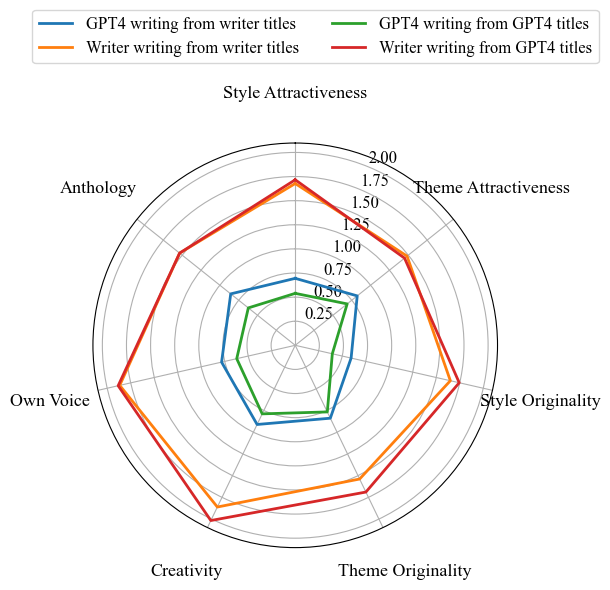

In [26]:
df_radial = generate_df_radial_plot({'GPT4 writing from writer titles': describe_gpt_title_by_patricio,
                                    'Writer writing from writer titles': describe_patricio_title_by_patricio,
                                    'GPT4 writing from GPT4 titles': describe_gpt_title_by_gpt,
                                    'Writer writing from GPT4 titles': describe_patricio_title_by_gpt,
                                    })
radio_plot(df_radial)

In [27]:
df_radial

,1_atractivo_estilo,1_atractivo_tema,2_originalidad_estilo,2_originalidad_tema,4_creatividad_sinopsis,6_voz_propia,6_antologia
GPT4 writing from writer titles,0.694444,0.822222,0.594444,0.838889,0.911111,0.783333,0.855556
Writer writing from writer titles,1.677778,1.483333,1.650000,1.538889,1.861111,1.866667,1.533333
GPT4 writing from GPT4 titles,0.538889,0.688889,0.394444,0.766667,0.788889,0.622222,0.622222
Writer writing from GPT4 titles,1.716667,1.450000,1.744444,1.688889,2.016667,1.883333,1.533333
